In [2]:
import os
for dirname, _, filenames in os.walk('C:\\Users\\YASODHARA\\Downloads\\musicdataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


C:\Users\YASODHARA\Downloads\musicdataset\data1.csv
C:\Users\YASODHARA\Downloads\musicdataset\dataset.csv
C:\Users\YASODHARA\Downloads\musicdataset\datasets\datasets\Notes\Eight\e1.jpg
C:\Users\YASODHARA\Downloads\musicdataset\datasets\datasets\Notes\Eight\e10.jpg
C:\Users\YASODHARA\Downloads\musicdataset\datasets\datasets\Notes\Eight\e100.jpg
C:\Users\YASODHARA\Downloads\musicdataset\datasets\datasets\Notes\Eight\e1000.jpg
C:\Users\YASODHARA\Downloads\musicdataset\datasets\datasets\Notes\Eight\e101.jpg
C:\Users\YASODHARA\Downloads\musicdataset\datasets\datasets\Notes\Eight\e102.jpg
C:\Users\YASODHARA\Downloads\musicdataset\datasets\datasets\Notes\Eight\e103.jpg
C:\Users\YASODHARA\Downloads\musicdataset\datasets\datasets\Notes\Eight\e104.jpg
C:\Users\YASODHARA\Downloads\musicdataset\datasets\datasets\Notes\Eight\e105.jpg
C:\Users\YASODHARA\Downloads\musicdataset\datasets\datasets\Notes\Eight\e106.jpg
C:\Users\YASODHARA\Downloads\musicdataset\datasets\datasets\Notes\Eight\e107.jpg
C:\Us

In [4]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


ModuleNotFoundError: No module named 'tensorflow.keras'

**Veri Seti Seçimi**

In [ ]:
# Veri yolu
data_dir = '../input/music-notes-datasets/datasets/datasets/Notes'

# ImageDataGenerator ile veri artırma
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

# Eğitim ve doğrulama veri setleri
train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 4000 images belonging to 5 classes.
Found 1000 images belonging to 5 classes.


**Veri Ön İşleme**

X_train shape: (4000, 64, 64, 3)
y_train shape: (4000, 5)
X_test shape: (992, 64, 64, 3)
y_test shape: (992, 5)
Sample image shape: (64, 64, 3)


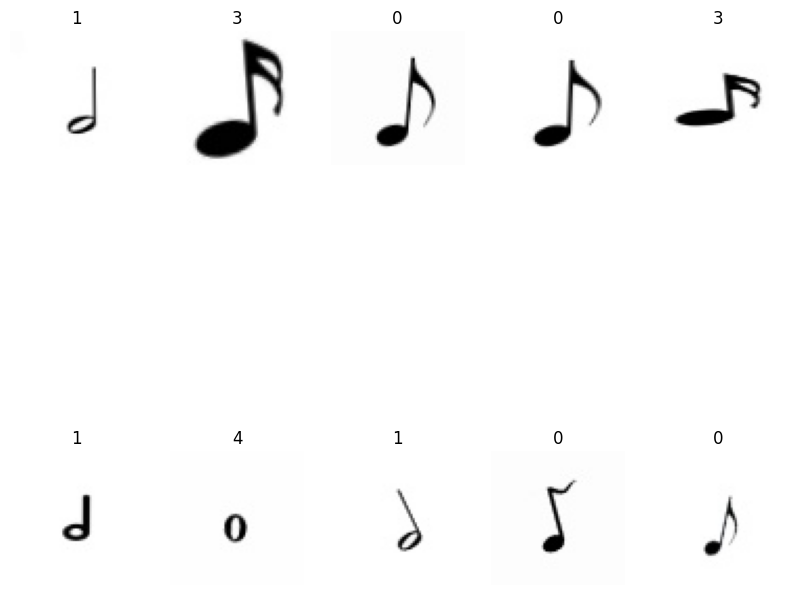

In [10]:
# Verileri X_train, y_train, X_test ve y_test olarak bölelim
X_train, y_train = [], []
X_test, y_test = [], []

for _ in range(train_generator.samples // train_generator.batch_size):
    img, label = next(train_generator)
    X_train.extend(img)
    y_train.extend(label)

for _ in range(validation_generator.samples // validation_generator.batch_size):
    img, label = next(validation_generator)
    X_test.extend(img)
    y_test.extend(label)

X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

# Boyutları yazdırma
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

# Görüntülerin boyutlarını yazdırma
print("Sample image shape:", X_train[0].shape)

# 10 görüntüyü görselleştirme
plt.figure(figsize=(10, 10))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_train[i])
    plt.title(np.argmax(y_train[i]))
    plt.axis('off')
plt.show()

# Verileri normalize etme
X_train = X_train / 255.0
X_test = X_test / 255.0

**CNN Modeli Oluşturma ve Derleme**

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Model tanımı
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(5, activation='softmax')
])

# Model derleme
model.compile(optimizer=Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


**Model Eğitimi**

In [12]:
history = model.fit(
    train_generator,
    epochs=20,
    validation_data=validation_generator
)


Epoch 1/20


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


125/125 ━━━━━━━━━━━━━━━━━━━━ 16s 111ms/step - accuracy: 0.5412 - loss: 1.0873 - val_accuracy: 0.8730 - val_loss: 0.2678
Epoch 2/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 14s 108ms/step - accuracy: 0.9388 - loss: 0.1711 - val_accuracy: 0.8740 - val_loss: 0.4119
Epoch 3/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 14s 112ms/step - accuracy: 0.9811 - loss: 0.0530 - val_accuracy: 0.9030 - val_loss: 0.3666
Epoch 4/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 14s 107ms/step - accuracy: 0.9833 - loss: 0.0507 - val_accuracy: 0.9320 - val_loss: 0.1879
Epoch 5/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 14s 111ms/step - accuracy: 0.9938 - loss: 0.0203 - val_accuracy: 0.9450 - val_loss: 0.2488
Epoch 6/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 14s 106ms/step - accuracy: 0.9961 - loss: 0.0175 - val_accuracy: 0.8940 - val_loss: 0.3622
Epoch 7/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 15s 115ms/step - accuracy: 0.9840 - loss: 0.0475 - val_accuracy: 0.9520 - val_loss: 0.1160
Epoch 8/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 14s 106ms/step - accuracy: 0.9969 - loss: 0.0113 - val

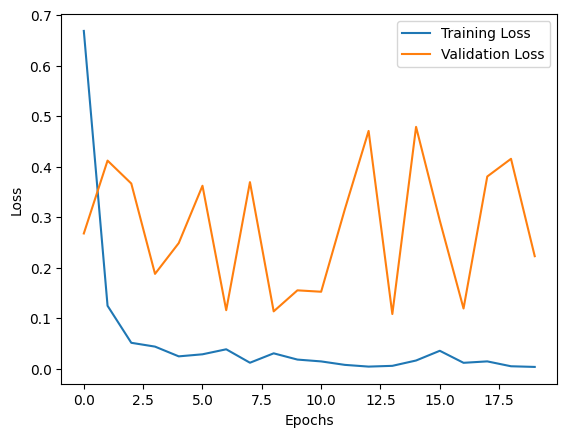

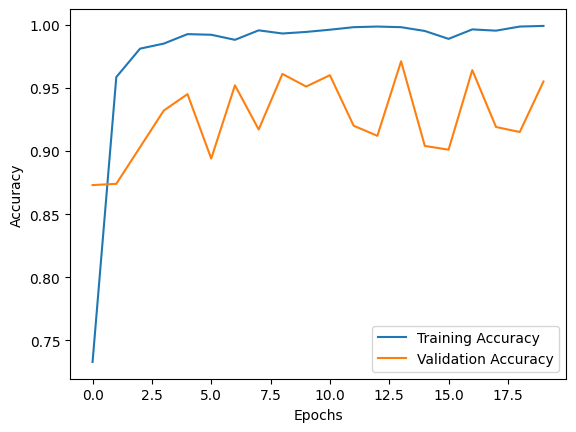

In [13]:
# Eğitim ve doğrulama kaybı
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Eğitim ve doğrulama doğruluğu
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

**Doğrulama veri seti üzerinde modelin performansı**

In [14]:
val_loss, val_accuracy = model.evaluate(validation_generator)
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_accuracy}")

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.9595 - loss: 0.2215
Validation Loss: 0.22285372018814087
Validation Accuracy: 0.9549999833106995


**Modeli Kaydet******

In [15]:
try:
    model.save('music_note_classifier.h5')
    print("Model kaydedildi: music_note_classifier.h5")
except Exception as e:
    print("Model kaydedilirken bir hata oluştu:", e)


Model kaydedildi: music_note_classifier.h5


**Modeli Yükle**

In [16]:
from tensorflow.keras.models import load_model

try:
    model = load_model('/kaggle/working/music_note_classifier.h5')
    print("Model yüklendi: music_note_classifier.h5")
except Exception as e:
    print("Model yüklenirken bir hata oluştu:", e)


Model yüklendi: music_note_classifier.h5


In [17]:
from tensorflow.keras.preprocessing import image
import numpy as np

def prepare_image(img_path):
    img = image.load_img(img_path, target_size=(64, 64))  # Modelin giriş boyutu
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Modelin beklediği şekle getirin
    img_array /= 255.0  # Normalizasyon
    return img_array

def predict_image(model, img_path):
    img_array = prepare_image(img_path)
    predictions = model.predict(img_array)
    class_idx = np.argmax(predictions, axis=1)
    return class_idx

In [18]:
class_labels = list(train_generator.class_indices.keys())

def get_class_label(class_idx):
    return class_labels[class_idx[0]]

**Sonuç, Test**

In [22]:
img_path = '/kaggle/input/trialset/trial sixteenth.png'
class_idx = predict_image(model, img_path)
class_label = get_class_label(class_idx)

print(f'The predicted class is: {class_label}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
The predicted class is: Eight
